In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [3]:

df_coles = pd.read_csv('/Users/donquintin/Desktop/truco-o-dato/data/data_aprobados_colegio_barrio.csv', sep=';')

df_coles_bcn = df_coles[df_coles['Municipi']=='BARCELONA']

FileNotFoundError: [Errno 2] No such file or directory: '/Users/donquintin/Desktop/truco-o-dato/data/data_aprobados_colegio_barrio.csv'

In [4]:
df_coles_bcn_publicos = df_coles_bcn[df_coles_bcn['Naturalesa']=='PÚBLIC']
df_coles_bcn_privats = df_coles_bcn[df_coles_bcn['Naturalesa']=='PRIVAT']

df_promocionan_publics = df_coles_bcn_publicos[df_coles_bcn_publicos['Resultat de l\'avaluació']=='PROMOCIONEN SENSE PENDENTS']
df_pendientes_publics = df_coles_bcn_publicos[df_coles_bcn_publicos['Resultat de l\'avaluació']=='PROMOCIONEN AMB PENDENTS']
df_nop_publics = df_coles_bcn_publicos[df_coles_bcn_publicos['Resultat de l\'avaluació']=='NO PROMOCIONEN']

df_promocionan_privats = df_coles_bcn_privats[df_coles_bcn_privats['Resultat de l\'avaluació']=='PROMOCIONEN SENSE PENDENTS']
df_pendientes_privats = df_coles_bcn_privats[df_coles_bcn_privats['Resultat de l\'avaluació']=='PROMOCIONEN AMB PENDENTS']
df_nop_privats = df_coles_bcn_privats[df_coles_bcn_privats['Resultat de l\'avaluació']=='NO PROMOCIONEN']

count_promo_publics = df_promocionan_publics['Alumnes avaluats'].sum()
count_promo_privats = df_promocionan_privats['Alumnes avaluats'].sum()

count_pendents_publics = df_pendientes_publics['Alumnes avaluats'].sum()
count_pendents_privats = df_pendientes_privats['Alumnes avaluats'].sum()

count_nop_publics = df_nop_publics['Alumnes avaluats'].sum()
count_nop_privats = df_nop_privats['Alumnes avaluats'].sum()


NameError: name 'df_coles_bcn' is not defined

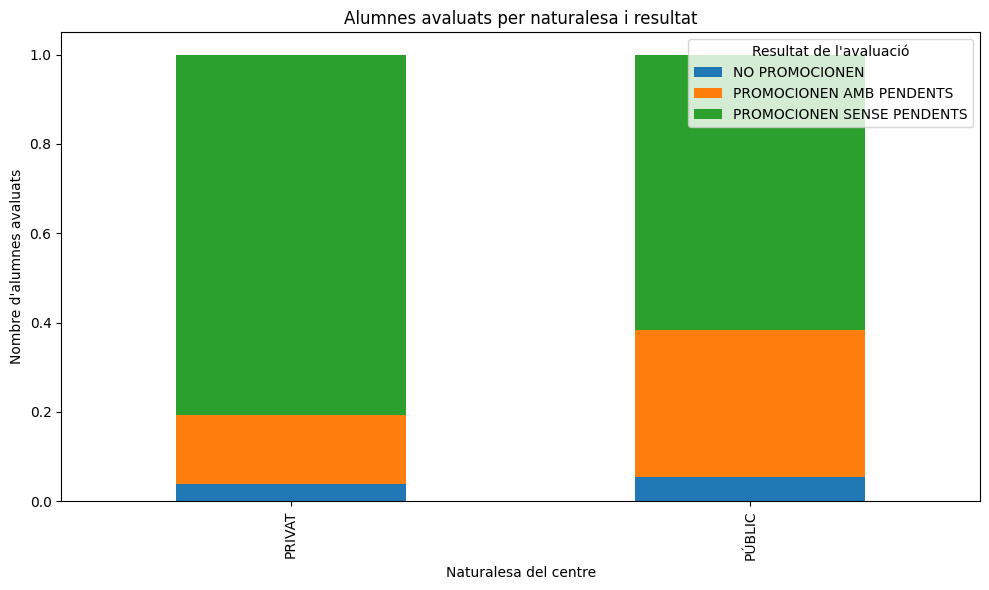

In [37]:
df_grafico = df_coles_bcn[['Naturalesa','Resultat de l\'avaluació','Alumnes avaluats']]

df_grouped = df_grafico.groupby(['Naturalesa', "Resultat de l'avaluació"])['Alumnes avaluats'].sum().unstack()

df_frac = df_grouped.div(df_grouped.sum(axis=1),axis=0)

df_frac.plot(kind='bar', stacked=True, figsize=(10,6))

plt.title("Alumnes avaluats per naturalesa i resultat")
plt.xlabel("Naturalesa del centre")
plt.ylabel("Nombre d'alumnes avaluats")
plt.legend(title="Resultat de l'avaluació")
plt.tight_layout()
plt.show()
